# pycisTopic analysis

Full dataset, using SCREEN regions.

In [1]:
import pycisTopic
pycisTopic.__version__

'1.0.1.dev21+g8aa75d8.d20220714'

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
import pickle
import pandas as pd

In [4]:
!pwd

/dodrio/scratch/projects/starting_2022_023/benchmark/scatac_benchmark/full_2_cistopic


In [6]:
import os
wdir = '/dodrio/scratch/projects/starting_2022_023/benchmark/scatac_benchmark/full_2_cistopic'
os.chdir( wdir )

In [7]:
import glob
from collections import OrderedDict
import numpy as np

In [8]:
scrub_name_suffix = "0-4"
cto_paths = sorted(glob.glob(f'cistopic_objects/*__cto.scrublet{scrub_name_suffix}.fmx.singlets.pkl'))
cistopic_obj_path_dict = {x.split('/')[-1].split(f'__cto.scrublet{scrub_name_suffix}.fmx.singlets.pkl')[0]:x for x in cto_paths}
cistopic_obj_path_dict

{'BIO_ddseq_1.FULL': 'cistopic_objects/BIO_ddseq_1.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'BIO_ddseq_2.FULL': 'cistopic_objects/BIO_ddseq_2.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'BIO_ddseq_3.FULL': 'cistopic_objects/BIO_ddseq_3.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'BIO_ddseq_4.FULL': 'cistopic_objects/BIO_ddseq_4.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'BRO_mtscatac_1.FULL': 'cistopic_objects/BRO_mtscatac_1.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'BRO_mtscatac_2.FULL': 'cistopic_objects/BRO_mtscatac_2.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'CNA_10xmultiome_1.FULL': 'cistopic_objects/CNA_10xmultiome_1.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'CNA_10xmultiome_2.FULL': 'cistopic_objects/CNA_10xmultiome_2.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'CNA_10xv11_1.FULL': 'cistopic_objects/CNA_10xv11_1.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'CNA_10xv11_2.FULL': 'cistopic_objects/CNA_10xv11_2.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'CNA_10xv11_3.FULL': 'cistopic_objects/

In [12]:
n_topics_final = 30
n_topics = 30
topics_final = set([str(x+1) for x in list(range(1,n_topics_final))])
n_cores = 36
n_iter = "400"

In [13]:
mounts = "/lustre1,/staging,/data,/vsc-hard-mounts,/scratch"
sif = "../0_resources/cistopic_image/20220815_pycistopic.sif"
script = "../0_resources/scripts/runModels_lda_mallet.py"

f_mod_dir = 'models__screen__mallet'
if not os.path.exists(os.path.join(wdir, f_mod_dir)):
    os.makedirs(os.path.join(wdir, f_mod_dir))

for sample in cistopic_obj_path_dict.keys():
    infile = cistopic_obj_path_dict[sample]
    outfile = os.path.join(f_mod_dir, sample + '__models_' + str(n_iter) + '_iter.pkl')
    
    intermediate_dir = f"{f_mod_dir}/model_intermediates/{sample}_model_intermediates/"
        
    if not os.path.exists(outfile):
        if not os.path.exists(os.path.join(wdir, intermediate_dir)):
            os.makedirs(os.path.join(wdir, intermediate_dir))
        else:
            print(f'{intermediate_dir} already exists!')
            
        n_topics_detected = len(os.listdir(os.path.join(wdir, intermediate_dir)))
        if not n_topics_detected == n_topics:
            model_tmp_dir = f"{f_mod_dir}/model_tmp/{sample}_model_tmp/"
            if not os.path.exists(os.path.join(wdir, model_tmp_dir)):
                os.makedirs(os.path.join(wdir, model_tmp_dir))
                
            topics_detected = set([x.replace('Topic','').replace('.pkl','') for x in os.listdir(os.path.join(wdir, intermediate_dir))])
            topics_todo = str(list(topics_final - topics_detected)).replace("'","").replace(' ','').replace('[','').replace(']','')
            ver=str(n_topics_final)
            
            if not topics_todo == '':
                out_log = f"{f_mod_dir}/{sample}.models_out_log{ver}.txt"
                cmd = f"echo {sample} && cd {wdir} && singularity exec -B {mounts} {sif} python {script} -i {infile} -o {outfile} -nt {topics_todo} -c {n_cores} -it {n_iter} -a 50 -abt True -e 0.1 -ebt False -sp {intermediate_dir} -s 555 -td {model_tmp_dir} > {out_log}"

                print(cmd)
                sh_path = f"{f_mod_dir}/{sample}.runmodels{ver}.sh"
                with open(sh_path, 'w') as file:
                    file.write(cmd)
            else:
                print('All topics done.')

    else:
        print(f'{outfile} already exists!')
    
    print('\n')

models__screen__mallet/model_intermediates/BIO_ddseq_1.FULL_model_intermediates/ already exists!
echo BIO_ddseq_1.FULL && cd /dodrio/scratch/projects/starting_2022_023/benchmark/scatac_benchmark/full_2_cistopic && singularity exec -B /lustre1,/staging,/data,/vsc-hard-mounts,/scratch ../0_resources/cistopic_image/20220815_pycistopic.sif python ../0_resources/scripts/runModels_lda_mallet.py -i cistopic_objects/BIO_ddseq_1.FULL__cto.scrublet0-4.fmx.singlets.pkl -o models__screen__mallet/BIO_ddseq_1.FULL__models_400_iter.pkl -nt 5,9,18,13,8,7,28,15,11,21,16,17,6,19,20,14,3,10,24,29,25,27,30,12,4,26,23,2,22 -c 36 -it 400 -a 50 -abt True -e 0.1 -ebt False -sp models__screen__mallet/model_intermediates/BIO_ddseq_1.FULL_model_intermediates/ -s 555 -td models__screen__mallet/model_tmp/BIO_ddseq_1.FULL_model_tmp/ > models__screen__mallet/BIO_ddseq_1.FULL.models_out_log30.txt


echo BIO_ddseq_2.FULL && cd /dodrio/scratch/projects/starting_2022_023/benchmark/scatac_benchmark/full_2_cistopic && sin

In [11]:
!cat ../0_resources/scripts/runModels_lda_mallet.py

import pickle
import sys
import argparse
import os
from pycisTopic.cistopic_class import *
from pycisTopic.lda_models import *

def make_argument_parser():
    """
    Creates an ArgumentParser to read the options for this script from
    sys.argv
    """
    parser = argparse.ArgumentParser(
        description="Run topic models.",)
    parser.add_argument('--inputcisTopic_obj', '-i', type=str, required=True,
                        help='Path to cisTopic object pickle file.')
    parser.add_argument('--output', '-o', type=str, required=True,
                        help='Path to save final model list.')
    parser.add_argument('--n_topics', '-nt', type=str, required=True, nargs='+',
                        help='Txt file containing selected topic id.')
    parser.add_argument('--n_cpu', '-c', type=int, required=True,
                        help = 'Number of cores')
    parser.add_argument('--n_iter', '-it', type=int, required=False, default=150,
                        help = 'Numbe

In shell:

In [44]:
for script in models__screen__mallet/*40.sh
do
    echo $script
    qsub $script -A lp_symbiosys -l nodes=1:ppn=36 -l walltime=12:00:00 -l pmem=2gb
done

SyntaxError: invalid syntax (3556938612.py, line 1)

Then, combine the models:

In [45]:
intermediate_dict = {x.split('/')[-1].split('_model_intermediates')[0]: x for x in sorted(glob.glob(f'{f_mod_dir}/model_intermediates/*'))}
intermediate_dict

{'BIO_ddseq_1.FULL': 'models__screen__mallet/model_intermediates/BIO_ddseq_1.FULL_model_intermediates',
 'BIO_ddseq_2.FULL': 'models__screen__mallet/model_intermediates/BIO_ddseq_2.FULL_model_intermediates',
 'BIO_ddseq_3.FULL': 'models__screen__mallet/model_intermediates/BIO_ddseq_3.FULL_model_intermediates',
 'BIO_ddseq_4.FULL': 'models__screen__mallet/model_intermediates/BIO_ddseq_4.FULL_model_intermediates',
 'BRO_mtscatac_1.FULL': 'models__screen__mallet/model_intermediates/BRO_mtscatac_1.FULL_model_intermediates',
 'BRO_mtscatac_2.FULL': 'models__screen__mallet/model_intermediates/BRO_mtscatac_2.FULL_model_intermediates',
 'CNA_10xmultiome_1.FULL': 'models__screen__mallet/model_intermediates/CNA_10xmultiome_1.FULL_model_intermediates',
 'CNA_10xmultiome_2.FULL': 'models__screen__mallet/model_intermediates/CNA_10xmultiome_2.FULL_model_intermediates',
 'CNA_10xv11_1.FULL': 'models__screen__mallet/model_intermediates/CNA_10xv11_1.FULL_model_intermediates',
 'CNA_10xv11_2.FULL': 'mod

In [47]:
for sample, directory in intermediate_dict.items():
    nmodels = len(os.listdir(directory))
    print(f"{nmodels} models in {directory}")
    save_path = f"{f_mod_dir}/{sample}__models_{n_iter}_iter.pkl"
    if not os.path.exists(save_path):
        file_list = sorted(os.listdir(directory))
        n_topics = [int(x.split('Topic')[-1].split('.pkl')[0]) for x in file_list]
        file_list_sorted = [file_list[x] for x in np.argsort(n_topics)]
        
        if len(os.listdir(directory)) == n_topics_final-1:
            print(f"\tsaving at {save_path}")

            models_merged = [pickle.load(open(f"{directory}/{file}", 'rb')) for file in file_list_sorted]

            with open(save_path, "wb") as f:
                    pickle.dump(models_merged, f, protocol=4)
                    
        else:
            print(f'\tn_models < {n_topics_final -1}, {len(sorted(os.listdir(directory)))}')
    else:
        print(f"\t{save_path} exists, skipping")

29 models in models__screen__mallet/model_intermediates/BIO_ddseq_1.FULL_model_intermediates
	models__screen__mallet/BIO_ddseq_1.FULL__models_400_iter.pkl exists, skipping
29 models in models__screen__mallet/model_intermediates/BIO_ddseq_2.FULL_model_intermediates
	models__screen__mallet/BIO_ddseq_2.FULL__models_400_iter.pkl exists, skipping
29 models in models__screen__mallet/model_intermediates/BIO_ddseq_3.FULL_model_intermediates
	models__screen__mallet/BIO_ddseq_3.FULL__models_400_iter.pkl exists, skipping
29 models in models__screen__mallet/model_intermediates/BIO_ddseq_4.FULL_model_intermediates
	models__screen__mallet/BIO_ddseq_4.FULL__models_400_iter.pkl exists, skipping
29 models in models__screen__mallet/model_intermediates/BRO_mtscatac_1.FULL_model_intermediates
	models__screen__mallet/BRO_mtscatac_1.FULL__models_400_iter.pkl exists, skipping
29 models in models__screen__mallet/model_intermediates/BRO_mtscatac_2.FULL_model_intermediates
	models__screen__mallet/BRO_mtscatac_2

In [21]:
from pycisTopic.lda_models import evaluate_models
import matplotlib.pyplot as plt

In [22]:
scrub_name_suffix = "0-4"
cto_paths = sorted(glob.glob(f'cistopic_objects/*__cto.scrublet{scrub_name_suffix}.fmx.singlets.pkl'))
cto_singlets_path_dict = {x.split('/')[-1].split(f'__cto.scrublet{scrub_name_suffix}.fmx.singlets.pkl')[0]:x for x in cto_paths}
cto_singlets_path_dict

{'BIO_ddseq_1.FULL': 'cistopic_objects/BIO_ddseq_1.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'BIO_ddseq_2.FULL': 'cistopic_objects/BIO_ddseq_2.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'BIO_ddseq_3.FULL': 'cistopic_objects/BIO_ddseq_3.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'BIO_ddseq_4.FULL': 'cistopic_objects/BIO_ddseq_4.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'BRO_mtscatac_1.FULL': 'cistopic_objects/BRO_mtscatac_1.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'BRO_mtscatac_2.FULL': 'cistopic_objects/BRO_mtscatac_2.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'CNA_10xmultiome_1.FULL': 'cistopic_objects/CNA_10xmultiome_1.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'CNA_10xmultiome_2.FULL': 'cistopic_objects/CNA_10xmultiome_2.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'CNA_10xv11_1.FULL': 'cistopic_objects/CNA_10xv11_1.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'CNA_10xv11_2.FULL': 'cistopic_objects/CNA_10xv11_2.FULL__cto.scrublet0-4.fmx.singlets.pkl',
 'CNA_10xv11_3.FULL': 'cistopic_objects/

In [23]:
n_iter = 400

In [49]:
models_path_dict = {x.split('/')[-1].split(f'__models_{n_iter}_iter.pkl')[0]: x for x in sorted(glob.glob(f'{f_mod_dir}/*{n_iter}_iter.pkl'))}
models_path_dict

{'BIO_ddseq_1.FULL': 'models__screen__mallet/BIO_ddseq_1.FULL__models_400_iter.pkl',
 'BIO_ddseq_2.FULL': 'models__screen__mallet/BIO_ddseq_2.FULL__models_400_iter.pkl',
 'BIO_ddseq_3.FULL': 'models__screen__mallet/BIO_ddseq_3.FULL__models_400_iter.pkl',
 'BIO_ddseq_4.FULL': 'models__screen__mallet/BIO_ddseq_4.FULL__models_400_iter.pkl',
 'BRO_mtscatac_1.FULL': 'models__screen__mallet/BRO_mtscatac_1.FULL__models_400_iter.pkl',
 'BRO_mtscatac_2.FULL': 'models__screen__mallet/BRO_mtscatac_2.FULL__models_400_iter.pkl',
 'CNA_10xmultiome_1.FULL': 'models__screen__mallet/CNA_10xmultiome_1.FULL__models_400_iter.pkl',
 'CNA_10xmultiome_2.FULL': 'models__screen__mallet/CNA_10xmultiome_2.FULL__models_400_iter.pkl',
 'CNA_10xv11_1.FULL': 'models__screen__mallet/CNA_10xv11_1.FULL__models_400_iter.pkl',
 'CNA_10xv11_2.FULL': 'models__screen__mallet/CNA_10xv11_2.FULL__models_400_iter.pkl',
 'CNA_10xv11_3.FULL': 'models__screen__mallet/CNA_10xv11_3.FULL__models_400_iter.pkl',
 'CNA_10xv11_4.FULL': '

We need to minimize Arun, minimize Cao & Juan, maximize Mimno & maximize log likelihood

In [55]:
optimal_topics_dict = {'BIO_ddseq_1.FULL': 11,
 'BIO_ddseq_2.FULL': 9,
 'BIO_ddseq_3.FULL': 11,
 'BIO_ddseq_4.FULL': 9,
 'BRO_mtscatac_1.FULL': 11,
 'BRO_mtscatac_2.FULL': 10,
 'CNA_10xmultiome_1.FULL': 12,
 'CNA_10xmultiome_2.FULL': 10,
 'CNA_10xv11_1.FULL': 8,
 'CNA_10xv11_2.FULL': 13,
 'CNA_10xv11_3.FULL': 12,
 'CNA_10xv11_4.FULL': 10,
 'CNA_10xv11_5.FULL': 13,
 'CNA_10xv2_1.FULL': 13,
 'CNA_10xv2_2.FULL': 9,
 'CNA_hydrop_1.FULL': 10,
 'CNA_hydrop_2.FULL': 9,
 'CNA_hydrop_3.FULL': 10,
 'CNA_mtscatac_1.FULL': 11,
 'CNA_mtscatac_2.FULL': 12,
 'EPF_hydrop_1.FULL': 8,
 'EPF_hydrop_2.FULL': 8,
 'EPF_hydrop_3.FULL': 11,
 'EPF_hydrop_4.FULL': 10,
 'HAR_ddseq_1.FULL': 8,
 'HAR_ddseq_2.FULL': 12,
 'MDC_mtscatac_1.FULL': 10,
 'MDC_mtscatac_2.FULL': 11,
 'SAN_10xmultiome_1.FULL': 12,
 'SAN_10xmultiome_2.FULL': 10,
 'STA_10xv11_1.FULL': 11,
 'STA_10xv11_2.FULL': 12,
 'TXG_10xv11_1.FULL': 10,
 'TXG_10xv2_1.FULL': 10,
 'TXG_10xv2_2.FULL': 10,
 'VIB_10xmultiome_1.FULL': 11,
 'VIB_10xmultiome_2.FULL': 10,
 'VIB_10xv1_1.FULL': 9,
 'VIB_10xv1_2.FULL': 8,
 'VIB_10xv2_1.FULL': 10,
 'VIB_10xv2_2.FULL': 10,
 'VIB_hydrop_1.FULL': 10,
 'VIB_hydrop_11.FULL': 11,
 'VIB_hydrop_12.FULL': 10,
 'VIB_hydrop_2.FULL': 10,
 'VIB_hydrop_21.FULL': 9,
 'VIB_hydrop_22.FULL': 10}

In [56]:
for sample in models_path_dict.keys():
    if sample not in optimal_topics_dict.keys():
        print(f"adding {sample}")
        optimal_topics_dict[sample] = 10
    else:
        print(f"{sample} in optimal_topics_dict")

optimal_topics_dict

BIO_ddseq_1.FULL in optimal_topics_dict
BIO_ddseq_2.FULL in optimal_topics_dict
BIO_ddseq_3.FULL in optimal_topics_dict
BIO_ddseq_4.FULL in optimal_topics_dict
BRO_mtscatac_1.FULL in optimal_topics_dict
BRO_mtscatac_2.FULL in optimal_topics_dict
CNA_10xmultiome_1.FULL in optimal_topics_dict
CNA_10xmultiome_2.FULL in optimal_topics_dict
CNA_10xv11_1.FULL in optimal_topics_dict
CNA_10xv11_2.FULL in optimal_topics_dict
CNA_10xv11_3.FULL in optimal_topics_dict
CNA_10xv11_4.FULL in optimal_topics_dict
CNA_10xv11_5.FULL in optimal_topics_dict
CNA_10xv2_1.FULL in optimal_topics_dict
CNA_10xv2_2.FULL in optimal_topics_dict
CNA_hydrop_1.FULL in optimal_topics_dict
CNA_hydrop_2.FULL in optimal_topics_dict
CNA_hydrop_3.FULL in optimal_topics_dict
CNA_mtscatac_1.FULL in optimal_topics_dict
CNA_mtscatac_2.FULL in optimal_topics_dict
EPF_hydrop_1.FULL in optimal_topics_dict
EPF_hydrop_2.FULL in optimal_topics_dict
EPF_hydrop_3.FULL in optimal_topics_dict
EPF_hydrop_4.FULL in optimal_topics_dict
HAR_

{'BIO_ddseq_1.FULL': 11,
 'BIO_ddseq_2.FULL': 9,
 'BIO_ddseq_3.FULL': 11,
 'BIO_ddseq_4.FULL': 9,
 'BRO_mtscatac_1.FULL': 11,
 'BRO_mtscatac_2.FULL': 10,
 'CNA_10xmultiome_1.FULL': 12,
 'CNA_10xmultiome_2.FULL': 10,
 'CNA_10xv11_1.FULL': 8,
 'CNA_10xv11_2.FULL': 13,
 'CNA_10xv11_3.FULL': 12,
 'CNA_10xv11_4.FULL': 10,
 'CNA_10xv11_5.FULL': 13,
 'CNA_10xv2_1.FULL': 13,
 'CNA_10xv2_2.FULL': 9,
 'CNA_hydrop_1.FULL': 10,
 'CNA_hydrop_2.FULL': 9,
 'CNA_hydrop_3.FULL': 10,
 'CNA_mtscatac_1.FULL': 11,
 'CNA_mtscatac_2.FULL': 12,
 'EPF_hydrop_1.FULL': 8,
 'EPF_hydrop_2.FULL': 8,
 'EPF_hydrop_3.FULL': 11,
 'EPF_hydrop_4.FULL': 10,
 'HAR_ddseq_1.FULL': 8,
 'HAR_ddseq_2.FULL': 12,
 'MDC_mtscatac_1.FULL': 10,
 'MDC_mtscatac_2.FULL': 11,
 'SAN_10xmultiome_1.FULL': 12,
 'SAN_10xmultiome_2.FULL': 10,
 'STA_10xv11_1.FULL': 11,
 'STA_10xv11_2.FULL': 12,
 'TXG_10xv11_1.FULL': 10,
 'TXG_10xv2_1.FULL': 10,
 'TXG_10xv2_2.FULL': 10,
 'VIB_10xmultiome_1.FULL': 11,
 'VIB_10xmultiome_2.FULL': 10,
 'VIB_10xv1_1.

BIO_ddseq_1.FULL
cistopic_objects/BIO_ddseq_1.FULL__cto.scrublet0-4.fmx.singlets.model_11topics.pkl
	cistopic_objects/BIO_ddseq_1.FULL__cto.scrublet0-4.fmx.singlets.model_11topics.pkl already exists! Skipping...
BIO_ddseq_2.FULL
cistopic_objects/BIO_ddseq_2.FULL__cto.scrublet0-4.fmx.singlets.model_9topics.pkl
	cistopic_objects/BIO_ddseq_2.FULL__cto.scrublet0-4.fmx.singlets.model_9topics.pkl already exists! Skipping...
BIO_ddseq_3.FULL
cistopic_objects/BIO_ddseq_3.FULL__cto.scrublet0-4.fmx.singlets.model_11topics.pkl
	cistopic_objects/BIO_ddseq_3.FULL__cto.scrublet0-4.fmx.singlets.model_11topics.pkl already exists! Skipping...
BIO_ddseq_4.FULL
cistopic_objects/BIO_ddseq_4.FULL__cto.scrublet0-4.fmx.singlets.model_9topics.pkl
	cistopic_objects/BIO_ddseq_4.FULL__cto.scrublet0-4.fmx.singlets.model_9topics.pkl already exists! Skipping...
BRO_mtscatac_1.FULL
cistopic_objects/BRO_mtscatac_1.FULL__cto.scrublet0-4.fmx.singlets.model_11topics.pkl
	cistopic_objects/BRO_mtscatac_1.FULL__cto.scruble

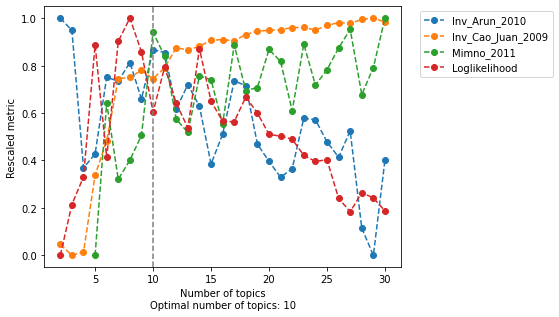

VIB_hydrop_1.FULL
cistopic_objects/VIB_hydrop_1.FULL__cto.scrublet0-4.fmx.singlets.model_10topics.pkl
	Loaded models__screen__mallet/VIB_hydrop_1.FULL__models_400_iter.pkl, evaluating...


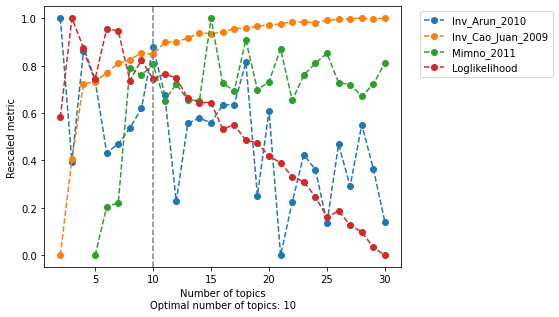

VIB_hydrop_11.FULL
cistopic_objects/VIB_hydrop_11.FULL__cto.scrublet0-4.fmx.singlets.model_11topics.pkl
	Loaded models__screen__mallet/VIB_hydrop_11.FULL__models_400_iter.pkl, evaluating...


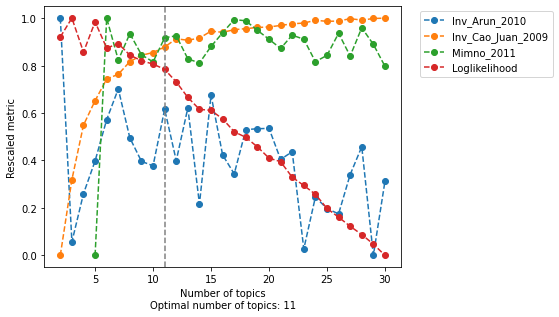

VIB_hydrop_12.FULL
cistopic_objects/VIB_hydrop_12.FULL__cto.scrublet0-4.fmx.singlets.model_10topics.pkl
	Loaded models__screen__mallet/VIB_hydrop_12.FULL__models_400_iter.pkl, evaluating...


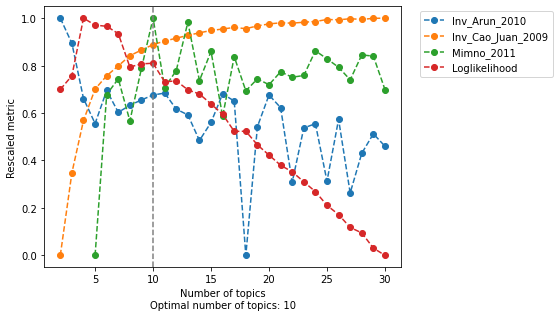

VIB_hydrop_2.FULL
cistopic_objects/VIB_hydrop_2.FULL__cto.scrublet0-4.fmx.singlets.model_10topics.pkl
	Loaded models__screen__mallet/VIB_hydrop_2.FULL__models_400_iter.pkl, evaluating...


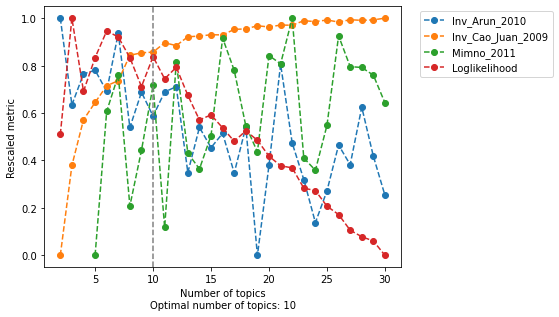

VIB_hydrop_21.FULL
cistopic_objects/VIB_hydrop_21.FULL__cto.scrublet0-4.fmx.singlets.model_9topics.pkl
	Loaded models__screen__mallet/VIB_hydrop_21.FULL__models_400_iter.pkl, evaluating...


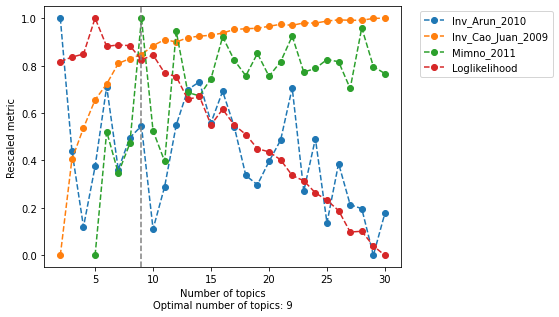

VIB_hydrop_22.FULL
cistopic_objects/VIB_hydrop_22.FULL__cto.scrublet0-4.fmx.singlets.model_10topics.pkl
	Loaded models__screen__mallet/VIB_hydrop_22.FULL__models_400_iter.pkl, evaluating...


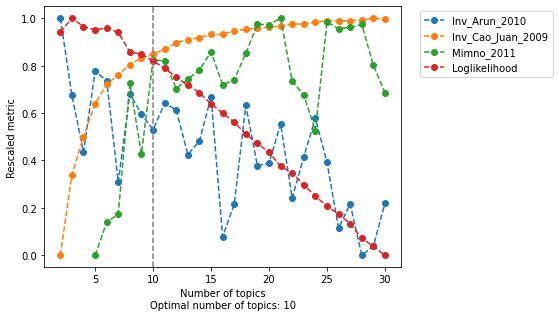

In [60]:
write = True
for sample in optimal_topics_dict.keys():
    cto_path = cto_singlets_path_dict[sample]
    print(sample)
    ntopics = optimal_topics_dict[sample]
    cto_path_new = cto_path.replace('.pkl', f'.model_{ntopics}topics.pkl')
    print(cto_path_new)
    if not os.path.isfile(cto_path_new):
        if(sample in list(models_path_dict.keys())):
            models_path = models_path_dict[sample]
            with open(models_path, 'rb') as f:
                models = pickle.load(f)

            print(f"\tLoaded {models_path}, evaluating...")
            model = evaluate_models(models,
                         select_model=optimal_topics_dict[sample], 
                         return_model=True, 
                         metrics=['Arun_2010','Cao_Juan_2009', 'Minmo_2011', 'loglikelihood'],
                         plot=True, # disabled since we only test one model here
                         plot_metrics=False,
                         save=f"plots_qc/{sample}__model_evaluation.png"
                         )
            
            if write == True:
                with open(cto_path, 'rb') as f:
                    cto = pickle.load(f)

                cto.add_LDA_model(model)

                with open(cto_path_new, "wb") as f:
                    pickle.dump(cto, f, protocol=4)

        else:
            print(f"\t{sample} models does not exist!")
    else:
        print(f"\t{cto_path_new} already exists! Skipping...")
        